<a href="https://colab.research.google.com/github/i-am-parker01/SPAM-V-S-HAM-Classifier/blob/main/SPAM_HAM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("/content/spam.csv.csv", encoding="latin-1")

In [38]:
# Loading the dataset
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [40]:
# Drop unnecessary columns (if present)
df = df[['v1', 'v2']]   # v1 = label, v2 = message
df.columns = ['label', 'message']

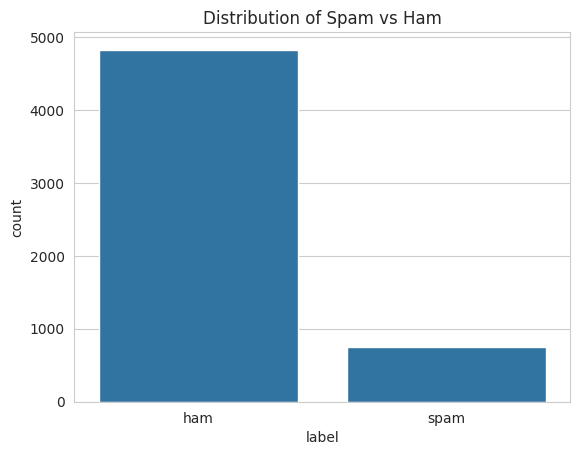

In [41]:
# 4. Encode labels (ham = 0, spam = 1)
df['label_num'] = df['label'].map({'ham':0, 'spam':1})

# Check balance
sns.countplot(x='label', data=df)
plt.title("Distribution of Spam vs Ham")
plt.show()

In [42]:
# Splitting the data
from sklearn.model_selection import train_test_split
X = df['message']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Vectorizing the data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [44]:
# Building the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [46]:
# 8. Predictions
y_pred = model.predict(X_test_vec)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
# Model Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



THE MODEL HAS AN ACCURACY OF 95-98%

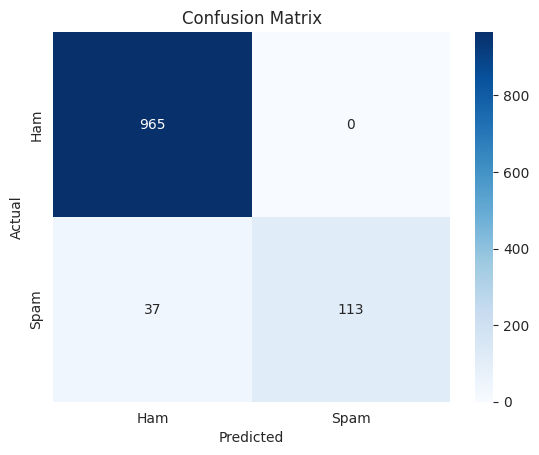

In [50]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [51]:
# Testing the model with custom messages observing Wheather it can classify a SPAM OR HAM message or not:
test_messages = [
    "Congrats! You have won a free lottery ticket. Call now to claim your prize!",
    "Hey, are we still meeting for lunch today?",
    "URGENT! Your account has been suspended. Verify your details immediately.",
    "Ok bro, see you at the party tonight.",
    "Get cheap loans with low interest rates. Limited offer, apply now!",
    "Good morning! Have a nice day 😊"
]

# Convert into DataFrame
import pandas as pd
test_df = pd.DataFrame(test_messages, columns=["message"])

# Transform text using same vectorizer used in training
X_test = vectorizer.transform(test_df["message"])

# Predict
predictions = model.predict(X_test)

# Add predictions to DataFrame
test_df["predicted_label"] = predictions
print(test_df)


                                             message  predicted_label
0  Congrats! You have won a free lottery ticket. ...                1
1         Hey, are we still meeting for lunch today?                0
2  URGENT! Your account has been suspended. Verif...                0
3              Ok bro, see you at the party tonight.                0
4  Get cheap loans with low interest rates. Limit...                0
5                    Good morning! Have a nice day 😊                0
